In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

import pandas as pd

df = pd.read_csv("ecommerceDataset.csv")
print(df.shape)
df.head()

(50424, 2)


,Household,"Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room."
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [8]:
df.columns= ['label', 'text']

In [9]:
df

,label,text
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...
...,...,...
50419,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50420,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50421,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50422,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


In [10]:
df.label.value_counts()

Household                 19312
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: label, dtype: int64

In [11]:
df.isnull().sum()

label    0
text     1
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [14]:
df["label_num"] = df.label.map({
    "Household": 0,
    "Books": 1,
    "Electronics": 2,
    "Clothing & Accessories": 3
})

C:\Users\ABDUL QADIR\.conda\envs\python\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [15]:
df.head(5)

,label,text,label_num
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",0
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,0
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",0
3,Household,Incredible Gifts India Wooden Happy Birthday U...,0
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...,0


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.text,
                                                    df.label_num, 
                                                    test_size=0.2,
                                                    random_state=2022,
                                                    stratify = df.label_num)

In [17]:
print("X_train_shape", X_train.shape)
print("X_test_shape", X_test.shape)

X_train_shape (40338,)
X_test_shape (10085,)


In [18]:
 y_train.value_counts()

0    15449
1     9456
2     8497
3     6936
Name: label_num, dtype: int64

In [19]:
y_test.value_counts()

0    3863
1    2364
2    2124
3    1734
Name: label_num, dtype: int64

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


cif  =Pipeline([
    ("vectorizer_tfidf", TfidfVectorizer()),
    ("KNN", KNeighborsClassifier())
])

cif.fit(X_train, y_train)
y_pred = cif.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3863
           1       0.97      0.96      0.96      2364
           2       0.96      0.94      0.95      2124
           3       0.98      0.97      0.97      1734

    accuracy                           0.96     10085
   macro avg       0.96      0.96      0.96     10085
weighted avg       0.96      0.96      0.96     10085



In [21]:
X_test[:5]

41535    Seagate 4TB Backup Plus Hub USB 3.0 Desktop 3....
9671     Prestige Marvel Glass 3 Burner Gas Stove (Blac...
49629    iVoltaa Next Gen Compact Wired Selfie Stick fo...
33657    TWO DOTS Air Bra for Girls and Women Combo of ...
19316    The Secret of Secrets: The Secrets of the Gold...
Name: text, dtype: object

In [22]:
y_test[:5]

41535    2
9671     0
49629    2
33657    3
19316    1
Name: label_num, dtype: int64

In [23]:
y_pred[:5]

array([2, 0, 2, 3, 1], dtype=int64)

# Attempt 2 :

using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.
Note:

use TF-IDF for pre-processing the text.

use MultinomialNB as the classifier.

print the classification report.

In [24]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      3863
           1       0.97      0.92      0.95      2364
           2       0.97      0.90      0.93      2124
           3       0.98      0.93      0.95      1734

    accuracy                           0.94     10085
   macro avg       0.95      0.93      0.94     10085
weighted avg       0.94      0.94      0.94     10085



# Attempt 3 :

using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.
Note:

use TF-IDF for pre-processing the text.

use Random Forest as the classifier.

print the classification report.

In [25]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3863
           1       0.97      0.98      0.97      2364
           2       0.98      0.94      0.96      2124
           3       0.99      0.97      0.98      1734

    accuracy                           0.97     10085
   macro avg       0.97      0.97      0.97     10085
weighted avg       0.97      0.97      0.97     10085



## Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [26]:
import spacy

nlp = spacy.load("en_core_web_sm")
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)
    

In [27]:
df["preprocesse_text"] = df['text'].apply(preprocess)

C:\Users\ABDUL QADIR\.conda\envs\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df.head()

,label,text,label_num,preprocesse_text
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",0,SAF Floral Framed Painting Wood 30 inch x 10 i...
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,0,saf uv texture Modern Art Print Framed Paintin...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",0,SAF Flower Print Framed Painting Synthetic 13....
3,Household,Incredible Gifts India Wooden Happy Birthday U...,0,incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...,0,Pitaara Box Romantic Venice Canvas Painting 6 ...


In [30]:
df.text[0]

"SAF 'Floral' Framed Painting (Wood, 30 inch x 10 inch, Special Effect UV Print Textured, SAO297) Painting made up in synthetic frame with UV textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch (A perfect gift for your special ones)."

In [36]:
df.preprocesse_text[0]

'SAF Floral Framed Painting Wood 30 inch x 10 inch Special Effect uv Print Textured SAO297 painting synthetic frame uv texture print give multi effect attract special series painting make wall beautiful give royal touch perfect gift special one'

## build model with preprocess text

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocesse_text, 
    df.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

**Let's check the scores with our best model till now**
- Random Forest

In [39]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3863
           1       0.98      0.97      0.98      2364
           2       0.98      0.95      0.96      2124
           3       0.98      0.97      0.98      1734

    accuracy                           0.97     10085
   macro avg       0.97      0.97      0.97     10085
weighted avg       0.97      0.97      0.97     10085



**Plot confusion matrix**

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[3788,   32,   28,   15],
       [  45, 2304,    9,    6],
       [  87,   13, 2017,    7],
       [  34,    9,    6, 1685]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

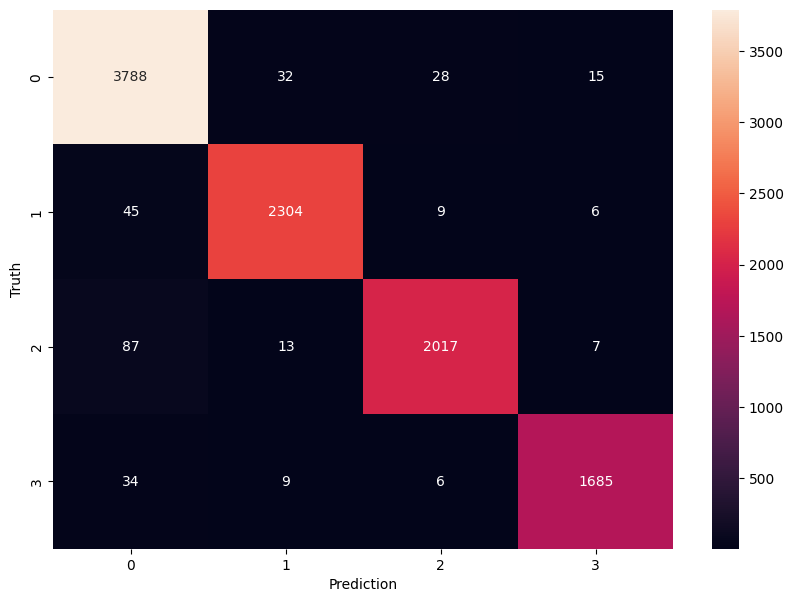

In [41]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')